# 1. SETUP AND IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


# 2. DATA LOADING AND EXPLORATION


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
try:
    df = pd.read_csv(url, names=column_names, na_values='?')
    print("Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
except:
    print(" Error loading data. Creating sample dataset...")
    np.random.seed(42)
    n_samples = 300
    df = pd.DataFrame({
        'age': np.random.randint(30, 80, n_samples),
        'sex': np.random.randint(0, 2, n_samples),
        'cp': np.random.randint(0, 4, n_samples),
        'trestbps': np.random.randint(90, 200, n_samples),
        'chol': np.random.randint(120, 400, n_samples),
        'fbs': np.random.randint(0, 2, n_samples),
        'restecg': np.random.randint(0, 3, n_samples),
        'thalach': np.random.randint(80, 200, n_samples),
        'exang': np.random.randint(0, 2, n_samples),
        'oldpeak': np.random.uniform(0, 6, n_samples),
        'slope': np.random.randint(0, 3, n_samples),
        'ca': np.random.randint(0, 4, n_samples),
        'thal': np.random.randint(1, 4, n_samples),
        'target': np.random.randint(0, 2, n_samples)
    })

print("\nDATASET OVERVIEW")
print(df.head())
print(f"\n Dataset Info:")
print(f"   • Shape: {df.shape}")
print(f"   • Features: {df.shape[1]-1}")
print(f"   • Samples: {df.shape[0]}")



Dataset loaded successfully!
Dataset shape: (303, 14)

DATASET OVERVIEW
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  

 Dataset Info:
   • Shape: (303, 14)
   • Features: 13
   • Samples: 303


# 3. DATA PREPROCESSING


In [3]:
print("\nDATA PREPROCESSING")
print(f"Missing values per column:")
missing_values = df.isnull().sum()
for col, missing in missing_values.items():
    if missing > 0:
        print(f"   • {col}: {missing}")

df = df.dropna()
print(f" After removing missing values: {df.shape}")

df['target'] = (df['target'] > 0).astype(int)
feature_descriptions = {
    'age': 'Age in years',
    'sex': 'Sex (1=male, 0=female)',
    'cp': 'Chest pain type (0-3)',
    'trestbps': 'Resting blood pressure',
    'chol': 'Serum cholesterol',
    'fbs': 'Fasting blood sugar > 120 mg/dl',
    'restecg': 'Resting ECG results (0-2)',
    'thalach': 'Maximum heart rate achieved',
    'exang': 'Exercise induced angina',
    'oldpeak': 'ST depression induced by exercise',
    'slope': 'Slope of peak exercise ST segment',
    'ca': 'Number of major vessels colored by fluoroscopy',
    'thal': 'Thalassemia (1=normal, 2=fixed defect, 3=reversible defect)'
}

print(f"\n Feature Descriptions:")
for feature, desc in feature_descriptions.items():
    print(f"   • {feature}: {desc}")



DATA PREPROCESSING
Missing values per column:
   • ca: 4
   • thal: 2
 After removing missing values: (297, 14)

 Feature Descriptions:
   • age: Age in years
   • sex: Sex (1=male, 0=female)
   • cp: Chest pain type (0-3)
   • trestbps: Resting blood pressure
   • chol: Serum cholesterol
   • fbs: Fasting blood sugar > 120 mg/dl
   • restecg: Resting ECG results (0-2)
   • thalach: Maximum heart rate achieved
   • exang: Exercise induced angina
   • oldpeak: ST depression induced by exercise
   • slope: Slope of peak exercise ST segment
   • ca: Number of major vessels colored by fluoroscopy
   • thal: Thalassemia (1=normal, 2=fixed defect, 3=reversible defect)


# 4. EXPLORATORY DATA ANALYSIS



 EXPLORATORY DATA ANALYSIS
Target Distribution:
   • No Disease (0): 160 (53.9%)
   • Disease (1): 137 (46.1%)


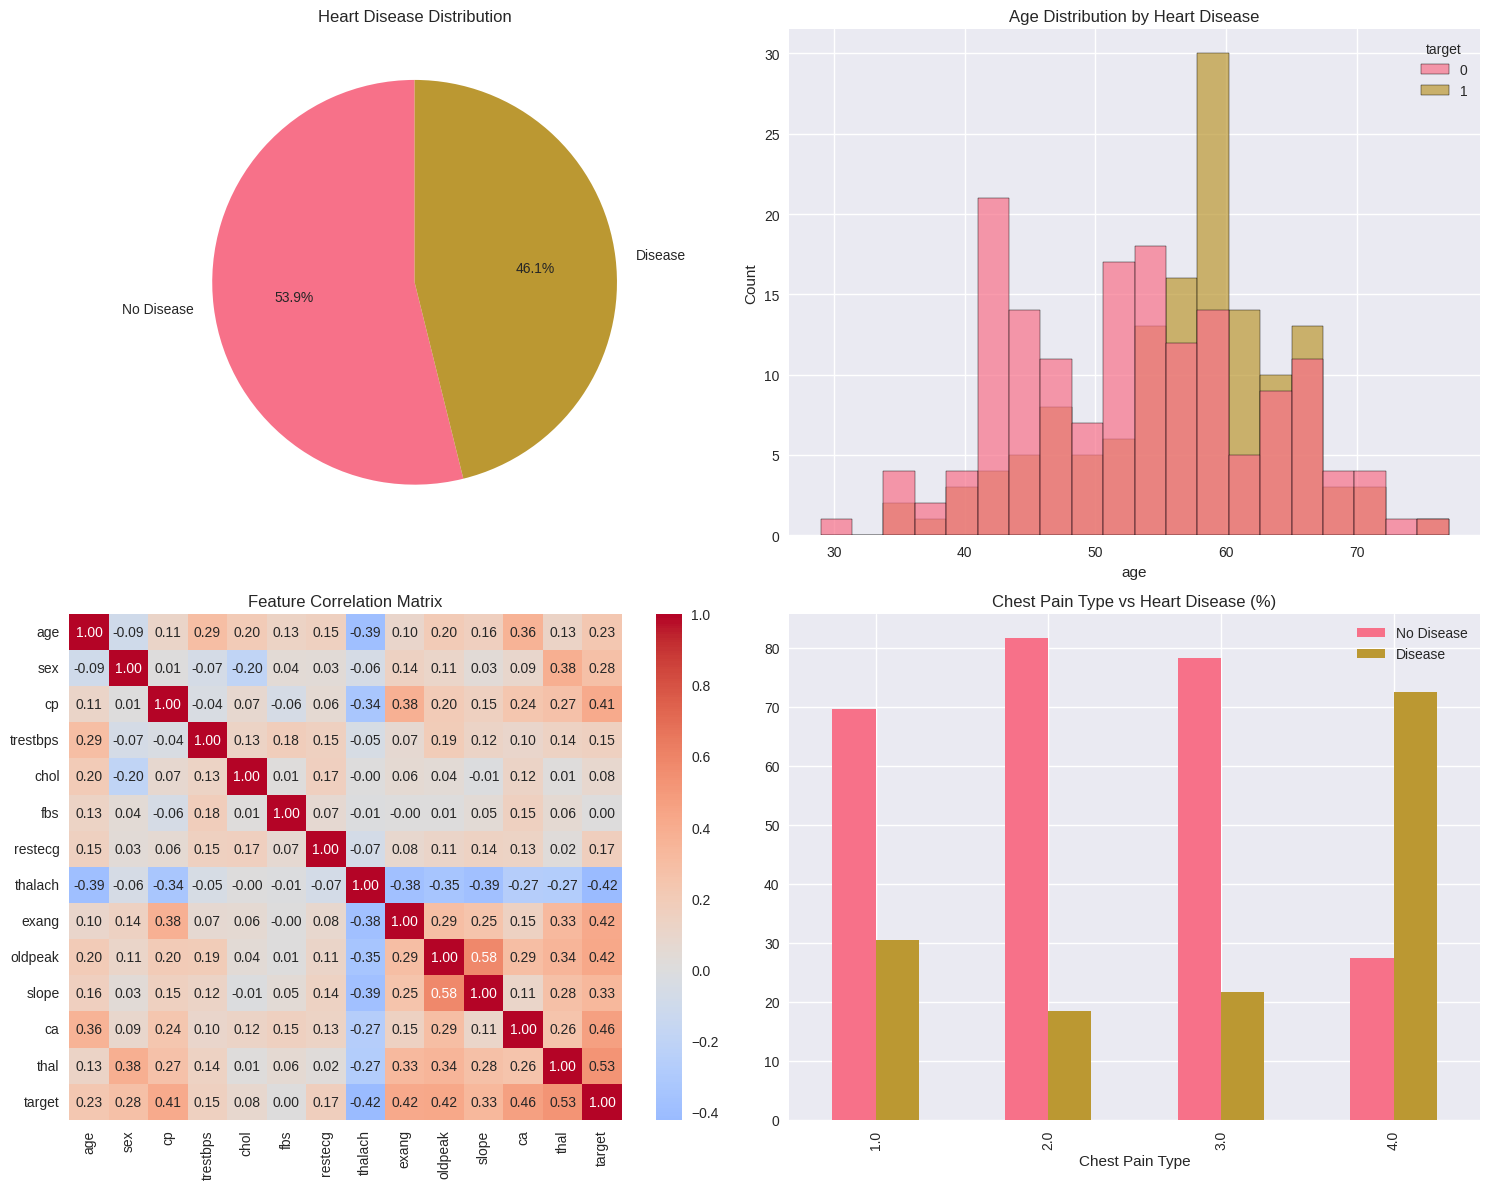


 Statistical Summary:
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    1.602694    0.676768   
std 

In [4]:
print("\n EXPLORATORY DATA ANALYSIS")
target_counts = df['target'].value_counts()
print(f"Target Distribution:")
print(f"   • No Disease (0): {target_counts[0]} ({target_counts[0]/len(df)*100:.1f}%)")
print(f"   • Disease (1): {target_counts[1]} ({target_counts[1]/len(df)*100:.1f}%)")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0,0].pie(target_counts.values, labels=['No Disease', 'Disease'],
              autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Heart Disease Distribution')

sns.histplot(data=df, x='age', hue='target', bins=20, alpha=0.7, ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Heart Disease')

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', ax=axes[1,0])
axes[1,0].set_title('Feature Correlation Matrix')

cp_target = pd.crosstab(df['cp'], df['target'], normalize='index') * 100
cp_target.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Chest Pain Type vs Heart Disease (%)')
axes[1,1].set_xlabel('Chest Pain Type')
axes[1,1].legend(['No Disease', 'Disease'])

plt.tight_layout()
plt.show()

print(f"\n Statistical Summary:")
print(df.describe())



# 5. FEATURE ENGINEERING


In [5]:
print("\n FEATURE ENGINEERING")

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(" Features scaled successfully!")




 FEATURE ENGINEERING
Training set: (237, 13)
Test set: (60, 13)
 Features scaled successfully!


# 6. MODEL TRAINING AND EVALUATION



In [6]:
print("\n MODEL TRAINING AND EVALUATION")
print("_" * 50)

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True)
}

results = {}
model_objects = {}

for name, model in models.items():
    print(f"\n Training {name}...")

    if name == 'SVM':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

    results[name] = {
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    model_objects[name] = model

    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")




 MODEL TRAINING AND EVALUATION
__________________________________________________

 Training Logistic Regression...
   Accuracy: 0.8333
   CV Score: 0.8221 (+/- 0.1528)

 Training Random Forest...
   Accuracy: 0.8667
   CV Score: 0.8181 (+/- 0.1206)

 Training SVM...
   Accuracy: 0.8500
   CV Score: 0.8136 (+/- 0.1924)


# 7. MODEL COMPARISON AND VISUALIZATION



 MODEL COMPARISON
                 Model  Test Accuracy  CV Mean  CV Std
0  Logistic Regression         0.8333   0.8221  0.0764
1        Random Forest         0.8667   0.8181  0.0603
2                  SVM         0.8500   0.8136  0.0962

 Best Model: Random Forest


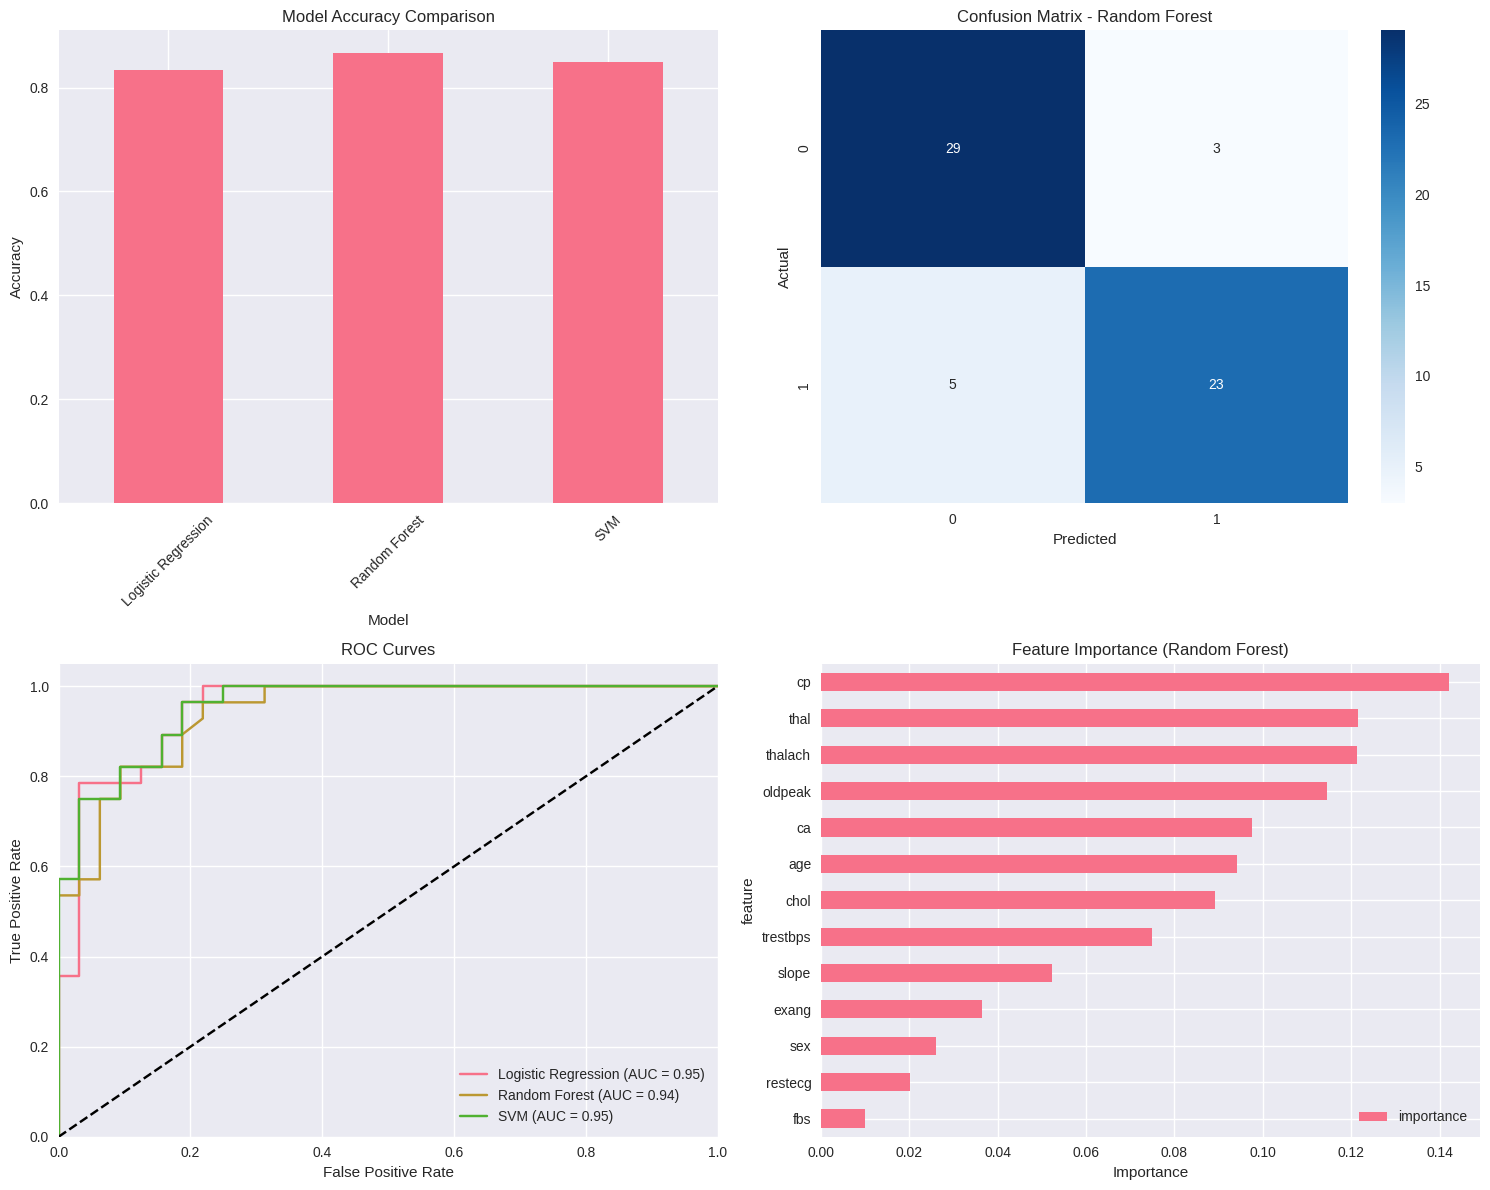

In [7]:
print("\n MODEL COMPARISON")

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Test Accuracy': [results[model]['accuracy'] for model in results.keys()],
    'CV Mean': [results[model]['cv_mean'] for model in results.keys()],
    'CV Std': [results[model]['cv_std'] for model in results.keys()]
})

print(comparison_df.round(4))

best_model_name = comparison_df.loc[comparison_df['Test Accuracy'].idxmax(), 'Model']
best_model = model_objects[best_model_name]
print(f"\n Best Model: {best_model_name}")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

comparison_df.set_index('Model')['Test Accuracy'].plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Model Accuracy Comparison')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].tick_params(axis='x', rotation=45)

best_predictions = results[best_model_name]['predictions']
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,1])
axes[0,1].set_title(f'Confusion Matrix - {best_model_name}')
axes[0,1].set_xlabel('Predicted')
axes[0,1].set_ylabel('Actual')

for name in results.keys():
    fpr, tpr, _ = roc_curve(y_test, results[name]['probabilities'])
    roc_auc = auc(fpr, tpr)
    axes[1,0].plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

axes[1,0].plot([0, 1], [0, 1], 'k--')
axes[1,0].set_xlim([0.0, 1.0])
axes[1,0].set_ylim([0.0, 1.05])
axes[1,0].set_xlabel('False Positive Rate')
axes[1,0].set_ylabel('True Positive Rate')
axes[1,0].set_title('ROC Curves')
axes[1,0].legend()

if 'Random Forest' in model_objects:
    rf_model = model_objects['Random Forest']
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=True)

    feature_importance.plot(x='feature', y='importance', kind='barh', ax=axes[1,1])
    axes[1,1].set_title('Feature Importance (Random Forest)')
    axes[1,1].set_xlabel('Importance')

plt.tight_layout()
plt.show()



# 8. DETAILED EVALUATION


In [8]:
print(f"\n DETAILED EVALUATION - {best_model_name}")


print("Classification Report:")
print(classification_report(y_test, best_predictions))




 DETAILED EVALUATION - Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.88      0.82      0.85        28

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60



# 9. PREDICTION FUNCTION


In [9]:
def predict_heart_disease(model, scaler, age, sex, cp, trestbps, chol, fbs,
                         restecg, thalach, exang, oldpeak, slope, ca, thal):
    """
    Predict heart disease for a new patient
    """

    features = np.array([[age, sex, cp, trestbps, chol, fbs, restecg,
                         thalach, exang, oldpeak, slope, ca, thal]])

    features_scaled = scaler.transform(features)


    prediction = model.predict(features_scaled)[0]
    probability = model.predict_proba(features_scaled)[0][1]

    return prediction, probability

print(f"\n SAMPLE PREDICTION")
print("_" * 50)

sample_patient = {
    'age': 63, 'sex': 1, 'cp': 3, 'trestbps': 188, 'chol': 233,
    'fbs': 2, 'restecg': 0, 'thalach': 150, 'exang': 0, 'oldpeak': 2.3,
    'slope': 0, 'ca': 0, 'thal': 1
}

prediction, probability = predict_heart_disease(best_model, scaler, **sample_patient)

print(f"Sample Patient Data:")
for key, value in sample_patient.items():
    print(f"   • {key}: {value}")

print(f"\nPrediction Results:")
print(f"   • Prediction: {'❤️ Heart Disease' if prediction == 1 else '💚 No Heart Disease'}")
print(f"   • Probability: {probability:.2%}")



 SAMPLE PREDICTION
__________________________________________________
Sample Patient Data:
   • age: 63
   • sex: 1
   • cp: 3
   • trestbps: 188
   • chol: 233
   • fbs: 2
   • restecg: 0
   • thalach: 150
   • exang: 0
   • oldpeak: 2.3
   • slope: 0
   • ca: 0
   • thal: 1

Prediction Results:
   • Prediction: 💚 No Heart Disease
   • Probability: 27.00%


# 10. MODEL SAVING

In [10]:
print(f"\n MODEL SAVING")
print(" Heart Disease Prediction Project Completed!")
print(f" Final Results Summary:")
print(f"   • Best Model: {best_model_name}")
print(f"   • Test Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"   • Cross-validation Score: {results[best_model_name]['cv_mean']:.4f}")



 MODEL SAVING
 Heart Disease Prediction Project Completed!
 Final Results Summary:
   • Best Model: Random Forest
   • Test Accuracy: 0.8667
   • Cross-validation Score: 0.8181
